In [1]:
import os
import pandas as pd
import numpy as np
import math
from datetime import datetime
from tqdm import tqdm, trange

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import plotly.express as px
from difflib import SequenceMatcher

In [2]:
from platform import python_version
print(python_version())

3.9.7


### Recuperando datos

In [51]:
# Reclamos
file_name = 'data/data_merged.csv'
datos_preprocessed = pd.read_pickle(file_name)

In [52]:
datos_preprocessed.columns

Index(['Numero reclamo', 'Nombre', 'Numero documento', 'Cod servicio',
       'Cod motivo', 'Cod ATM', 'ATM error', 'Numero cajero', 'Monto',
       'Fecha operacion', 'Fecha presentacion', 'Fecha resultado',
       'Estado reclamo', 'Cod oficina', 'Det oficina', 'Cod region',
       'Dependencia', 'Cod dependencia derivada', 'Ultima derivacion',
       'Numero carta respuesta', 'Direccion domicilio', 'Fase reclamo',
       'Mes presentacion', 'Dias reclamo', 'Anio presentacion', 'Cod usuario',
       'Usuario', 'Canal ingreso', 'Medio respuesta', 'Categoria',
       'Hace carta', 'Correo electronico', 'Cuenta ahorro', 'Descripcion',
       'Motivo.1', 'Departamento', 'Provincia', 'Distrito', 'Es Lima',
       'fecha fase 1', 'fecha fase 2', 'fecha fase 3', 'fecha fase 4',
       'fecha fase 5', 'fecha fase 6', 'fecha fase 7', 'Servicio BN',
       'Motivo BN', 'Canal Incidencia SBS', 'Servicio SBS', 'Motivo SBS',
       'Canal Incidencia', 'Servicio', 'Motivo', 'Nivel'],
      dtype='

In [53]:
# Trimestres
#datos_preprocessed['Trimestre'] = str(datos_preprocessed['fecha_fase1'].dt.year)+'-'+str(datos_preprocessed['fecha_fase1'].dt.quarter)
datos_preprocessed['Trimestre'] = datos_preprocessed['fecha fase 1'].apply(lambda x: str(x.year)+'-'+str(x.quarter))

<AxesSubplot:xlabel='Trimestre'>

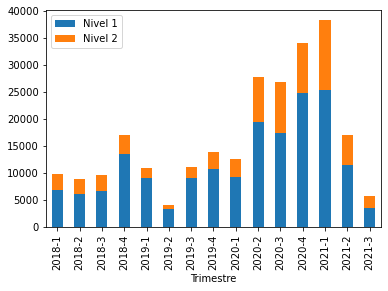

In [54]:
data_temp = datos_preprocessed.groupby(['Trimestre','Nivel']).agg({'Numero reclamo': "count"})
data_temp = data_temp.sort_values(by=['Trimestre']).reset_index()
data_temp.set_index("Trimestre", inplace = True)

nivel1 = data_temp[data_temp['Nivel']=='1er'][['Numero reclamo']]
nivel1.columns = ['Nivel 1']
nivel2 = data_temp[data_temp['Nivel']!='1er'][['Numero reclamo']]
nivel2.columns = ['Nivel 2']
data_temp = pd.merge(nivel1, nivel2, on="Trimestre")

data_temp.head()
data_temp.plot(kind="bar", stacked=True)

In [55]:
datos_preprocessed = datos_preprocessed[datos_preprocessed['Nivel']=='1er'].reset_index(drop=True)
datos_preprocessed.head()

,Numero reclamo,Nombre,Numero documento,Cod servicio,Cod motivo,Cod ATM,ATM error,Numero cajero,Monto,Fecha operacion,...,Servicio BN,Motivo BN,Canal Incidencia SBS,Servicio SBS,Motivo SBS,Canal Incidencia,Servicio,Motivo,Nivel,Trimestre
0,023818-7,TORRES SENMACHE PATHY PAMELA,41114765,100,10000,NaN,NaN,NaN,NaN,19/09/2018,...,100,10000,01,102,01,OFICINA,CUENTA DE AHORRO (DESTINADA A DEPÓSITO DE REMU...,"INCUMPLIMIENTO DE CLAUSULAS DE LOS CONTRATOS, ...",1er,2018-3
1,002718-4016,CARLOS RIQUELME ROMAN,43471167,100,10000,NaN,NaN,NaN,NaN,15/08/2018,...,100,10000,01,102,01,OFICINA,CUENTA DE AHORRO (DESTINADA A DEPÓSITO DE REMU...,"INCUMPLIMIENTO DE CLAUSULAS DE LOS CONTRATOS, ...",1er,2018-3
2,002719-6276,RICARDO ARTURO RIVERA NUÑEZ,30831857,100,10000,NaN,NaN,NaN,892.74,20/12/2019,...,100,10000,01,102,01,OFICINA,CUENTA DE AHORRO (DESTINADA A DEPÓSITO DE REMU...,"INCUMPLIMIENTO DE CLAUSULAS DE LOS CONTRATOS, ...",1er,2019-4
3,010119-356,VERAMENDI ANCASI JAVIER,09952556,100,10000,NaN,NaN,NaN,8000,29/10/2019,...,100,10000,01,102,01,OFICINA,CUENTA DE AHORRO (DESTINADA A DEPÓSITO DE REMU...,"INCUMPLIMIENTO DE CLAUSULAS DE LOS CONTRATOS, ...",1er,2019-4
4,010119-354,MEDINA RAMOS JOSE LUIS,29353518,100,10000,NaN,NaN,NaN,NaN,26/08/2019,...,100,10000,01,102,01,OFICINA,CUENTA DE AHORRO (DESTINADA A DEPÓSITO DE REMU...,"INCUMPLIMIENTO DE CLAUSULAS DE LOS CONTRATOS, ...",1er,2019-4


<AxesSubplot:xlabel='Trimestre'>

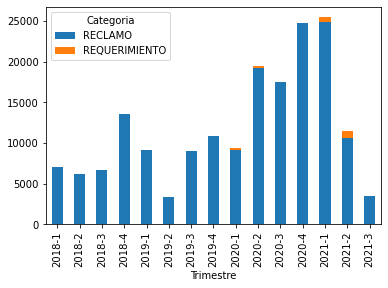

In [56]:
data_temp = datos_preprocessed.groupby(['Trimestre','Categoria']).agg({'Numero reclamo': "count"})
data_temp = data_temp.sort_values(by=['Trimestre']).reset_index()
data_temp = data_temp.pivot(index =['Trimestre'], columns ='Categoria')
data_temp.columns = data_temp.columns.droplevel()
data_temp.fillna(0, inplace = True)
data_temp = data_temp.reset_index()
data_temp = data_temp.set_index('Trimestre')

data_temp.head()
data_temp.plot(kind="bar", stacked=True)

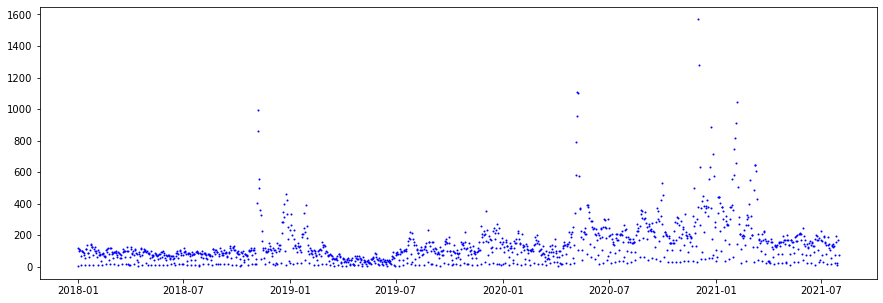

In [57]:
data_temp = datos_preprocessed.groupby(['fecha fase 1']).agg({ 'Numero reclamo': "count"})
data_temp = data_temp.sort_values(by=['Numero reclamo']).reset_index()
data_temp
fig = plt.figure(figsize = (15, 5))
plt.scatter(data_temp['fecha fase 1'], data_temp['Numero reclamo'], s =1, c = 'blue')

In [58]:
data_temp = datos_preprocessed.groupby(['Canal Incidencia']).agg({ 'Numero reclamo': "count"})
data_temp = data_temp.sort_values(by=['Numero reclamo'], ascending = False).reset_index()

# fig = px.treemap(data_temp, path=[px.Constant('Canal de Incidencia'),'Canal Incidencia'], values='Numero reclamo',
#                   color='Numero reclamo', hover_data=['Canal Incidencia'])
# fig.show()

total = np.sum(data_temp['Numero reclamo'])
data_temp['per'] = data_temp['Numero reclamo']/total*100

data_temp.to_excel("canal_pie.xlsx") 
fig = px.pie(data_temp, values='per', names='Canal Incidencia', title='Porcentage por Canal de Incidencia')
fig.show()

In [59]:
data_temp = datos_preprocessed.groupby(['Motivo SBS']).agg({ 'Numero reclamo': "count"})
data_temp = data_temp.sort_values(by=['Numero reclamo'], ascending = False).reset_index()

total = np.sum(data_temp['Numero reclamo'])
data_temp['per'] = data_temp['Numero reclamo']/total*100
data_temp = data_temp.sort_values(by=['per'], ascending = False)

# fig = px.pie(data_temp, values='per', names='Cod Motivo SBS', title='Porcentage por Motivo')
# fig.show()

data_temp['motivo'] = data_temp.apply(lambda x: x['Motivo SBS'] if x['per'] >= 2 else 'Otros', axis=1)
data_temp = data_temp.groupby(['motivo']).agg({ 'per': "sum"}).reset_index()

data_temp.to_excel("motivos_pie.xlsx")

fig = px.pie(data_temp, values='per', names='motivo', title='Porcentaje por Motivo')
fig.show()

In [60]:
data_temp = datos_preprocessed.groupby(['Motivo']).agg({ 'Numero reclamo': "count"})
data_temp = data_temp.sort_values(by=['Numero reclamo'], ascending = False).reset_index()

total = np.sum(data_temp['Numero reclamo'])
data_temp['per'] = data_temp['Numero reclamo']/total*100
data_temp = data_temp.sort_values(by=['per'], ascending = False)

# fig = px.pie(data_temp, values='per', names='Cod Motivo SBS', title='Porcentage por Motivo')
# fig.show()

data_temp['motivo'] = data_temp.apply(lambda x: x['Motivo'] if x['per'] >= 2 else 'Otros', axis=1)
data_temp = data_temp.groupby(['motivo']).agg({ 'per': "sum"}).reset_index()

data_temp.to_excel("motivos_pie.xlsx")

fig = px.pie(data_temp, values='per', names='motivo', title='Porcentaje por Motivo')
fig.show()

In [61]:
data_temp = datos_preprocessed.groupby(['Servicio']).agg({ 'Numero reclamo': "count"})
data_temp = data_temp.sort_values(by=['Numero reclamo'], ascending = False).reset_index()

total = np.sum(data_temp['Numero reclamo'])
data_temp['per'] = data_temp['Numero reclamo']/total*100
data_temp = data_temp.sort_values(by=['per'], ascending = False)

data_temp['servicio'] = data_temp.apply(lambda x: x['Servicio'] if x['per'] >= 2 else 'Otros', axis=1)
data_temp = data_temp.groupby(['servicio']).agg({ 'per': "sum"}).reset_index()

data_temp
data_temp.to_excel("servicio_pie.xlsx")
fig = px.pie(data_temp, values='per', names='servicio', title='Porcentaje por Servicio')
fig.show()

In [62]:
data_temp = datos_preprocessed.groupby(['Servicio','Motivo']).agg({ 'Numero reclamo': "count"})
data_temp = data_temp.sort_values(by=['Numero reclamo'], ascending = False).reset_index()

fig = px.treemap(data_temp, path=[px.Constant('Codigo de reclamo'),'Servicio','Motivo'], values='Numero reclamo',
                  color='Numero reclamo', hover_data=['Servicio','Motivo'])
fig.show()

In [15]:
# data_temp = datos_preprocessed.groupby(['Trimestre','Nivel','Reclamo/requerim']).agg({'N° Reclamo': "count"})
# data_temp = data_temp.sort_values(by=['Trimestre']).reset_index()
# data_temp.head()

In [16]:
datos_preprocessed.head()

,Numero reclamo,Nombre,Numero documento,Cod servicio,Cod motivo,Cod ATM,ATM error,Numero cajero,Monto,Fecha operacion,...,Servicio BN,Motivo BN,Canal Incidencia SBS,Servicio SBS,Motivo SBS,Canal Incidencia,Servicio,Motivo,Nivel,Trimestre
0,023818-7,TORRES SENMACHE PATHY PAMELA,41114765,100,10000,NaN,NaN,NaN,NaN,19/09/2018,...,100,10000,01,102,01,OFICINA,CUENTA DE AHORRO (DESTINADA A DEPÓSITO DE REMU...,"INCUMPLIMIENTO DE CLAUSULAS DE LOS CONTRATOS, ...",1er,2018-3
1,002718-4016,CARLOS RIQUELME ROMAN,43471167,100,10000,NaN,NaN,NaN,NaN,15/08/2018,...,100,10000,01,102,01,OFICINA,CUENTA DE AHORRO (DESTINADA A DEPÓSITO DE REMU...,"INCUMPLIMIENTO DE CLAUSULAS DE LOS CONTRATOS, ...",1er,2018-3
2,002719-6276,RICARDO ARTURO RIVERA NUÑEZ,30831857,100,10000,NaN,NaN,NaN,892.74,20/12/2019,...,100,10000,01,102,01,OFICINA,CUENTA DE AHORRO (DESTINADA A DEPÓSITO DE REMU...,"INCUMPLIMIENTO DE CLAUSULAS DE LOS CONTRATOS, ...",1er,2019-4
3,010119-356,VERAMENDI ANCASI JAVIER,09952556,100,10000,NaN,NaN,NaN,8000,29/10/2019,...,100,10000,01,102,01,OFICINA,CUENTA DE AHORRO (DESTINADA A DEPÓSITO DE REMU...,"INCUMPLIMIENTO DE CLAUSULAS DE LOS CONTRATOS, ...",1er,2019-4
4,010119-354,MEDINA RAMOS JOSE LUIS,29353518,100,10000,NaN,NaN,NaN,NaN,26/08/2019,...,100,10000,01,102,01,OFICINA,CUENTA DE AHORRO (DESTINADA A DEPÓSITO DE REMU...,"INCUMPLIMIENTO DE CLAUSULAS DE LOS CONTRATOS, ...",1er,2019-4


In [17]:
# data_temp = data_lima_m.groupby(['DISTRICT',DIAGNOSIS_PARAMETER]).agg({ 'QTY_PEOPLE_SERVED': "sum"})
# data_temp = data_temp.reset_index()
# data_temp = data_temp.groupby(['DISTRICT']).agg({ DIAGNOSIS_PARAMETER: "count"})
# data_temp = data_temp.reset_index()

# fig = px.treemap(data_temp,
#                  path=[px.Constant('DISTRICTS'),'DISTRICT'],
#                  values=DIAGNOSIS_PARAMETER,
#                  color=DIAGNOSIS_PARAMETER,
#                  hover_data=['DISTRICT'])
# fig.show()

#### Recuperando codigos SBS

In [18]:
data_temp = datos_preprocessed.groupby(['Trimestre', 'Servicio']).agg({ 'Numero reclamo': "count"})
data_temp = data_temp.reset_index()
# data_temp = data_temp.groupby(['DISTRICT']).agg({ DIAGNOSIS_PARAMETER: "count"})
# data_temp = data_temp.reset_index()
data_temp.head()

,Trimestre,Servicio,Numero reclamo
0,2018-1,CHEQUES,32
1,2018-1,CREDITO HIPOTECARIO PARA VIVIENDA,3
2,2018-1,CREDITOS DE CONSUMO - PRESTAMOS MULTIRED,255
3,2018-1,CUENTA CORRIENTE,14
4,2018-1,CUENTA DE AHORRO (DESTINADA A DEPÓSITO DE REMU...,5208


In [19]:
data_temp = datos_preprocessed.groupby(['Trimestre', 'Servicio']).agg({ 'Numero reclamo': "count"})
data_temp = data_temp.reset_index()


top_df = pd.DataFrame()
date_uniques = np.sort(data_temp['Trimestre'].unique())

for date in date_uniques:
    temp_df = data_temp[data_temp['Trimestre']==date]
    
    total = np.sum(temp_df['Numero reclamo'])
    temp_df['per'] = temp_df['Numero reclamo']/total*100
    temp_df['per'] = temp_df['Numero reclamo']
    

    temp_df = temp_df.sort_values(by=['per'], ascending=False)
    #temp_df = temp_df.head(10).reset_index(drop=True)
    top_df = pd.concat([top_df, temp_df])
    
diagnosis = top_df['Servicio'].unique()

# For ausent dates
for date in date_uniques:
    temp_df = top_df[top_df['Trimestre']==date]
    diagnosis_temp = list(set(diagnosis) - set(temp_df['Servicio'].values))
    temp_df = pd.DataFrame(diagnosis_temp, columns =['Servicio'])
    temp_df['Trimestre']=date
    temp_df['per']=0
    top_df = pd.concat([top_df, temp_df])

top_df = top_df.sort_values(by=['Trimestre', 'Servicio'], ascending=True)

C:\Users\johnk\AppData\Local\Temp/ipykernel_12100/3657199764.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\johnk\AppData\Local\Temp/ipykernel_12100/3657199764.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



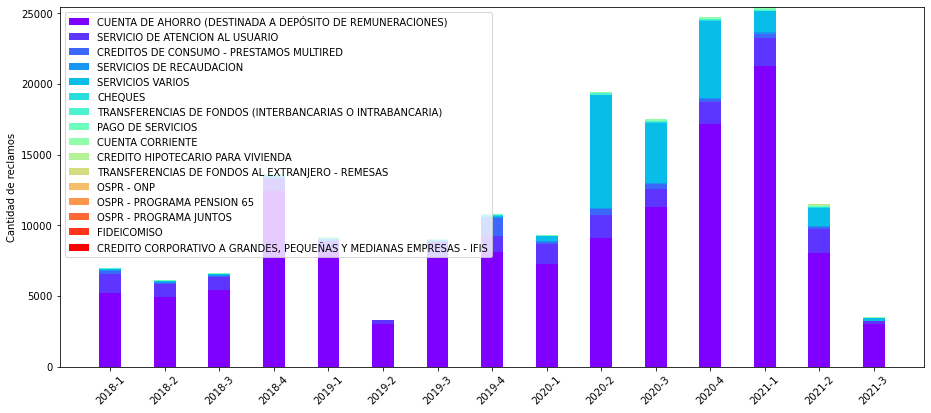

In [20]:
x_element = [str(item)[:7] for item in np.unique(top_df['Trimestre'])]
n = len(x_element)
ind = np.arange(n) 
width = 0.40

name = "gist_rainbow"
name = "terrain"
name = "rainbow"
cmap = cm.get_cmap(name, 256)  # type: matplotlib.colors.ListedColormap
colors = cmap(np.linspace(0, 1, len(diagnosis)))

fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])

values_temp = 0
i = 0
for diag in diagnosis:
    temp_df = top_df[top_df['Servicio']==diag]
    values = temp_df['per'].values
    ax.bar(ind, values, width, bottom=values_temp, color=colors[i])
    values_temp = values_temp + values
    i+=1

ax.set_ylabel('Cantidad de reclamos')
#ax.set_title('Porcentaje de servicios por mes')
ax.set_xticks(ind)
ax.set_xticklabels(x_element, rotation=45)

#ax.legend(labels=diagnosis, bbox_to_anchor = (1.15, 1))
ax.legend(labels=diagnosis)
plt.show()

In [30]:
data_temp = datos_preprocessed.groupby(['Trimestre', 'Servicio']).agg({ 'Numero reclamo': "count"})
data_temp = data_temp.reset_index()


top_df = pd.DataFrame()
date_uniques = np.sort(data_temp['Trimestre'].unique())

for date in date_uniques:
    temp_df = data_temp[data_temp['Trimestre']==date]
    
    total = np.sum(temp_df['Numero reclamo'])
    temp_df['per'] = temp_df['Numero reclamo']/total*100
    #temp_df['per'] = temp_df['Numero reclamo']
    

    temp_df = temp_df.sort_values(by=['per'], ascending=False)
    #temp_df = temp_df.head(3).reset_index(drop=True)
    top_df = pd.concat([top_df, temp_df])
    
diagnosis = top_df['Servicio'].unique()

# For ausent dates
for date in date_uniques:
    temp_df = top_df[top_df['Trimestre']==date]
    diagnosis_temp = list(set(diagnosis) - set(temp_df['Servicio'].values))
    temp_df = pd.DataFrame(diagnosis_temp, columns =['Servicio'])
    temp_df['Trimestre']=date
    temp_df['per']=0
    top_df = pd.concat([top_df, temp_df])

top_df.fillna(0, inplace = True)
top_df = top_df.sort_values(by=['Trimestre', 'Servicio'], ascending=True)

C:\Users\johnk\AppData\Local\Temp/ipykernel_12100/40298165.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



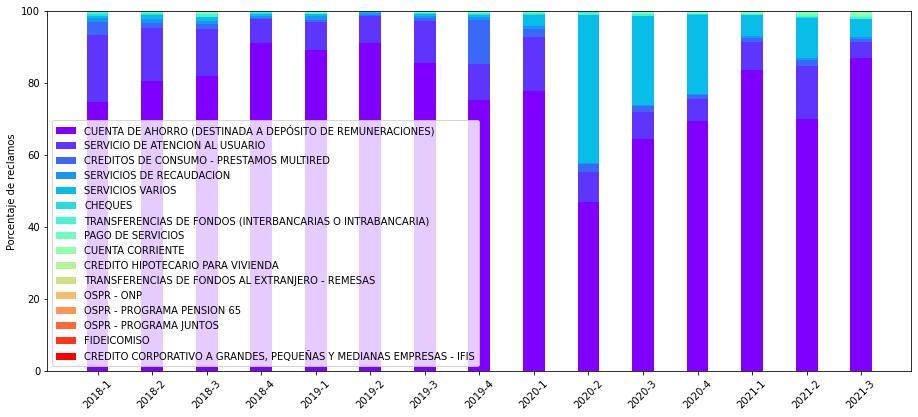

In [31]:
x_element = [str(item)[:7] for item in np.unique(top_df['Trimestre'])]
n = len(x_element)
ind = np.arange(n) 
width = 0.40

name = "gist_rainbow"
name = "terrain"
name = "rainbow"
cmap = cm.get_cmap(name, 256)  # type: matplotlib.colors.ListedColormap
colors = cmap(np.linspace(0, 1, len(diagnosis)))

fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])

values_temp = 0
i = 0
for diag in diagnosis:
    temp_df = top_df[top_df['Servicio']==diag]
    values = temp_df['per'].values
    ax.bar(ind, values, width, bottom=values_temp, color=colors[i])
    values_temp = values_temp + values
    i+=1

ax.set_ylabel('Porcentaje de reclamos')
#ax.set_title('Porcentaje de servicios por mes')
ax.set_xticks(ind)
ax.set_xticklabels(x_element, rotation=45)

#ax.legend(labels=diagnosis, bbox_to_anchor = (1.15, 1))
ax.legend(labels=diagnosis)
plt.show()

In [28]:
top_df[top_df['Servicio']=='SERVICIO DE ATENCION AL USUARIO']

,Trimestre,Servicio,Numero reclamo,per
1,2018-1,SERVICIO DE ATENCION AL USUARIO,1313.0,18.783977
1,2018-2,SERVICIO DE ATENCION AL USUARIO,911.0,14.878328
1,2018-3,SERVICIO DE ATENCION AL USUARIO,869.0,13.071600
1,2018-4,SERVICIO DE ATENCION AL USUARIO,897.0,6.592680
1,2019-1,SERVICIO DE ATENCION AL USUARIO,705.0,7.710817
1,2019-2,SERVICIO DE ATENCION AL USUARIO,247.0,7.446488
1,2019-3,SERVICIO DE ATENCION AL USUARIO,1072.0,11.863656
2,2019-4,SERVICIO DE ATENCION AL USUARIO,1085.0,10.041647
1,2020-1,SERVICIO DE ATENCION AL USUARIO,1399.0,15.005899
2,2020-2,SERVICIO DE ATENCION AL USUARIO,1604.0,8.255700


In [34]:
datos_preprocessed.columns

Index(['Numero reclamo', 'Nombre', 'Numero documento', 'Cod servicio',
       'Cod motivo', 'Cod ATM', 'ATM error', 'Numero cajero', 'Monto',
       'Fecha operacion', 'Fecha presentacion', 'Fecha resultado',
       'Estado reclamo', 'Cod oficina', 'Det oficina', 'Cod region',
       'Dependencia', 'Cod dependencia derivada', 'Ultima derivacion',
       'Numero carta respuesta', 'Direccion domicilio', 'Fase reclamo',
       'Mes presentacion', 'Dias reclamo', 'Anio presentacion', 'Cod usuario',
       'Usuario', 'Canal ingreso', 'Medio respuesta', 'Categoria',
       'Hace carta', 'Correo electronico', 'Cuenta ahorro', 'Descripcion',
       'Motivo.1', 'Departamento', 'Provincia', 'Distrito', 'Es Lima',
       'fecha fase 1', 'fecha fase 2', 'fecha fase 3', 'fecha fase 4',
       'fecha fase 5', 'fecha fase 6', 'fecha fase 7', 'Servicio BN',
       'Motivo BN', 'Canal Incidencia SBS', 'Servicio SBS', 'Motivo SBS',
       'Canal Incidencia', 'Servicio', 'Motivo', 'Nivel', 'Trimestre'],


In [138]:
datos_preprocessed['Year'] =  datos_preprocessed['fecha fase 1'] .dt.year

In [139]:
data_temp = datos_preprocessed.groupby(['Year', 'Servicio']).agg({ 'Numero reclamo': "count"})
data_temp = data_temp.reset_index()
data_temp = data_temp[data_temp['Year']!=0]
#data_temp = data_temp[(data_temp['Year']==2020) | (data_temp['Year']==2019)]
data_temp = data_temp[(data_temp['Year']>2019)]

top_df = pd.DataFrame()
date_uniques = np.sort(data_temp['Year'].unique())

for date in date_uniques:
    temp_df = data_temp[data_temp['Year']==date]
    
    total = np.sum(temp_df['Numero reclamo'])
    temp_df['per'] = temp_df['Numero reclamo']/total*100
    #temp_df['per'] = temp_df['Numero reclamo']
    

    temp_df = temp_df.sort_values(by=['per'], ascending=False)
    temp_df = temp_df.head(5).reset_index(drop=True)
    top_df = pd.concat([top_df, temp_df])
    
diagnosis = top_df['Servicio'].unique()

# For ausent dates
for date in date_uniques:
    temp_df = top_df[top_df['Year']==date]
    diagnosis_temp = list(set(diagnosis) - set(temp_df['Servicio'].values))
    temp_df = pd.DataFrame(diagnosis_temp, columns =['Servicio'])
    temp_df['Year']=date
    temp_df['per']=0
    top_df = pd.concat([top_df, temp_df])

top_df.fillna(0, inplace = True)
top_df = top_df.sort_values(by=['Year', 'Servicio'], ascending=True)

C:\Users\johnk\AppData\Local\Temp/ipykernel_12100/4051696933.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [140]:
top_df

,Year,Servicio,Numero reclamo,per
3,2020,CREDITOS DE CONSUMO - PRESTAMOS MULTIRED,1166.0,1.641722
0,2020,CUENTA CORRIENTE,0.0,0.000000
0,2020,CUENTA DE AHORRO (DESTINADA A DEPÓSITO DE REMU...,44824.0,63.111950
2,2020,SERVICIO DE ATENCION AL USUARIO,5833.0,8.212832
1,2020,SERVICIOS VARIOS,18058.0,25.425566
4,2020,TRANSFERENCIAS DE FONDOS (INTERBANCARIAS O INT...,323.0,0.454782
3,2021,CREDITOS DE CONSUMO - PRESTAMOS MULTIRED,459.0,1.135127
4,2021,CUENTA CORRIENTE,254.0,0.628153
0,2021,CUENTA DE AHORRO (DESTINADA A DEPÓSITO DE REMU...,32333.0,79.960926
1,2021,SERVICIO DE ATENCION AL USUARIO,3853.0,9.528638


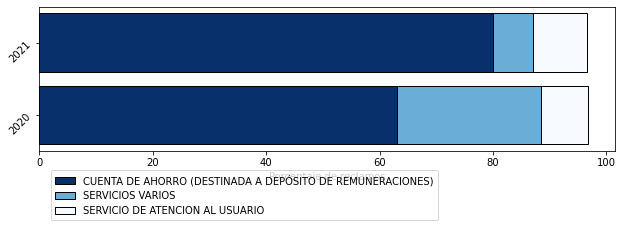

In [137]:
x_element = [str(item)[:7] for item in np.unique(top_df['Year'])]
n = len(x_element)
ind = np.arange(n) 
width = 0.40

name = "Blues"
cmap = cm.get_cmap(name, 256)  # type: matplotlib.colors.ListedColormap
colors = cmap(np.linspace(0, 1, len(diagnosis))[::-1])

fig = plt.figure(figsize=(8,2))
ax = fig.add_axes([0,0,1,1])

values_temp = 0
i = 0
for diag in diagnosis:
    temp_df = top_df[top_df['Servicio']==diag]
    values = temp_df['per'].values
    ax.barh(ind, values, left=values_temp, color=colors[i], edgecolor = "Black")
    #ax.barh(ind, values, color=colors[i])
    values_temp = values_temp + values
    i+=1

ax.set_xlabel('Porcentaje de reclamos')
#ax.set_title('Porcentaje de servicios por mes')
ax.set_yticks(ind)
ax.set_yticklabels(x_element, rotation=45)

ax.legend(labels=diagnosis, bbox_to_anchor = (0.7, -0.1))
#ax.legend(labels=diagnosis)
plt.show()

In [132]:
#data_temp = top_df[(top_df['Year']==2019) | (top_df['Year']==2020)]
data_temp = top_df

In [188]:
data_temp = data_temp.groupby(['Servicio']).agg({ 'Numero reclamo': "sum"})
data_temp = data_temp.reset_index()
data_temp['per'] = np.round(data_temp['Numero reclamo']/total*100,2)
data_temp = data_temp.sort_values(by=['per'], ascending=False)
data_temp['Complejidad'] = data_temp.index
data_temp['Complejidad'] = [7,10,1,5,7]
data_temp = data_temp.head(5)
data_temp = data_temp.reset_index(drop=True)
data_temp

,Servicio,Numero reclamo,per,Complejidad
0,CUENTA DE AHORRO (DESTINADA A DEPÓSITO DE REMU...,77157,190.81,7
1,SERVICIOS VARIOS,20963,51.84,10
2,SERVICIO DE ATENCION AL USUARIO,9686,23.95,1
3,CREDITOS DE CONSUMO - PRESTAMOS MULTIRED,1625,4.02,5
4,CUENTA CORRIENTE,552,1.37,7


In [224]:
import plotly.io as pio

import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv")

colors = ['blue', 'orange', 'green', 'red', 'purple']

opt = []
opts = []
for i in range(0, len(colors)):
    opt = dict(
        target = data_temp['Complejidad'][[i]], value = dict(marker = dict(color = colors[i]))
    )
    opts.append(opt)

data = [dict(
  type = 'scatter',
  mode = 'markers',
  x = data_temp['Complejidad'],
  y = data_temp['per'],
  text = data_temp['Servicio'],
  hoverinfo = 'text',
  opacity = 0.8,
  marker = dict(
      size = data_temp['per'],
      sizemode = 'area',
      sizeref = 0.02,
  ),
  transforms = [
      dict(
        type = 'groupby',
        groups = data_temp['Servicio'],
        styles = opts
    )]
)]

layout = dict(
    title='Importancia de los reclamos',
    width=650, 
    height=600,
    yaxis = dict(
        type = 'log',
        title = 'Representatividad' ,
    ),
    xaxis = dict(
        title = 'Complejidad' ,
    ),
    legend=dict(
        yanchor="bottom",
        y=-0.7,
        xanchor="left",
        x=0.01
    )
)

fig_dict = dict(data=data, layout=layout)




pio.show(fig_dict, validate=False)

In [179]:
opts

[{'target': array(['Asia'], dtype=object),
  'value': {'marker': {'color': 'blue'}}},
 {'target': array(['Asia'], dtype=object),
  'value': {'marker': {'color': 'orange'}}},
 {'target': array(['Asia'], dtype=object),
  'value': {'marker': {'color': 'green'}}},
 {'target': array(['Asia'], dtype=object),
  'value': {'marker': {'color': 'red'}}},
 {'target': array(['Asia'], dtype=object),
  'value': {'marker': {'color': 'purple'}}}]

In [178]:
import plotly.io as pio

import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv")

colors = ['blue', 'orange', 'green', 'red', 'purple']

opt = []
opts = []
for i in range(0, len(colors)):
    opt = dict(
        target = df['continent'][[i]].unique(), value = dict(marker = dict(color = colors[i]))
    )
    opts.append(opt)

data = [dict(
  type = 'scatter',
  mode = 'markers',
  x = df['lifeExp'],
  y = df['gdpPercap'],
  text = df['continent'],
  hoverinfo = 'text',
  opacity = 0.8,
  marker = dict(
      size = df['pop'],
      sizemode = 'area',
      sizeref = 200000
  ),
  transforms = [
      dict(
        type = 'filter',
        target = df['year'],
        orientation = '=',
        value = 2007
      ),
      dict(
        type = 'groupby',
        groups = df['continent'],
        styles = opts
    )]
)]

layout = dict(
    yaxis = dict(
        type = 'log'
    )
)

fig_dict = dict(data=data, layout=layout)
pio.show(fig_dict, validate=False)

In [146]:
data

[{'type': 'scatter',
  'mode': 'markers',
  'x': 0       28.801
  1       30.332
  2       31.997
  3       34.020
  4       36.088
           ...  
  1699    62.351
  1700    60.377
  1701    46.809
  1702    39.989
  1703    43.487
  Name: lifeExp, Length: 1704, dtype: float64,
  'y': 0       779.445314
  1       820.853030
  2       853.100710
  3       836.197138
  4       739.981106
             ...    
  1699    706.157306
  1700    693.420786
  1701    792.449960
  1702    672.038623
  1703    469.709298
  Name: gdpPercap, Length: 1704, dtype: float64,
  'text': 0         Asia
  1         Asia
  2         Asia
  3         Asia
  4         Asia
           ...  
  1699    Africa
  1700    Africa
  1701    Africa
  1702    Africa
  1703    Africa
  Name: continent, Length: 1704, dtype: object,
  'hoverinfo': 'text',
  'opacity': 0.8,
  'marker': {'size': 0        8425333.0
   1        9240934.0
   2       10267083.0
   3       11537966.0
   4       13079460.0
              ...    
